In [4]:
import pandas as pd
import numpy as np

In [14]:
food_nutrient = pd.read_csv("food_nutrient.csv")
branded_food = pd.read_csv("branded_food.csv")
food = pd.concat([pd.read_csv("food_sample_100.csv"), pd.read_csv("food_other.csv")], ignore_index=True)
food_merged = pd.merge(food, food_nutrient, on="fdc_id")
food_merged = pd.merge(food_merged, branded_food, on="fdc_id")

top_nutrient_list = ["Protein", "Sodium, Na", "Total lipid (fat)", "Carbohydrate, by difference", "Sugars, total including NLEA", "Fatty acids, total saturated", "Cholesterol", "Fiber, total dietary", "Calcium, Ca", "Iron, Fe"]
food_merged = food_merged[food_merged["name"].isin(top_nutrient_list)]

top_cat_list = ['Candy', 'Popcorn, Peanuts, Seeds & Related Snacks', 'Cheese', 'Ice Cream & Frozen Yogurt', 'Chips, Pretzels & Snacks', 'Cookies & Biscuits', 'Pickles, Olives, Peppers & Relishes', 'Breads & Buns', 'Fruit & Vegetable Juice, Nectars & Fruit Drinks', 'Snack, Energy & Granola Bars', 'Chocolate', 'Other Snacks']
food_merged = food_merged[food_merged["branded_food_category"].isin(top_cat_list)]

food_pivot = pd.crosstab(food_merged["branded_food_category"], food_merged["name"], food_merged["amount"], aggfunc=np.mean)



C:\Users\Jana Obendraufova\AppData\Local\Temp\ipykernel_9124\3661651094.py:13: FutureWarning: The provided callable <function mean at 0x000001AE3E05F9C0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  food_pivot = pd.crosstab(food_merged["branded_food_category"], food_merged["name"], food_merged["amount"], aggfunc=np.mean)


In [19]:
food_pivot

name,"Calcium, Ca","Carbohydrate, by difference",Cholesterol,"Fatty acids, total saturated","Fiber, total dietary","Iron, Fe",Protein,"Sodium, Na","Sugars, total including NLEA",Total lipid (fat)
branded_food_category,,,,,,,,,,
Candy,11.0,85.71,0.0,0.000,3.6,0.000,0.00,125.0,50.00,5.360
Cheese,714.0,0.00,54.0,12.500,0.0,0.000,25.00,679.0,0.00,21.430
Cookies & Biscuits,29.0,64.29,0.0,10.710,3.6,1.790,3.57,161.0,28.57,17.860
Other Snacks,321.5,62.50,0.0,3.575,3.6,2.355,7.14,982.5,3.57,23.215
"Pickles, Olives, Peppers & Relishes",0.0,7.14,0.0,0.000,3.6,0.000,0.00,286.0,7.14,0.000
"Snack, Energy & Granola Bars",213.0,44.68,11.0,8.510,6.4,2.300,31.91,511.0,25.53,10.640


In [25]:
food_pivot_norm = (food_pivot - food_pivot.mean()) / food_pivot.std()
food_pivot_norm.head(30)

name,"Calcium, Ca","Carbohydrate, by difference",Cholesterol,"Fatty acids, total saturated","Fiber, total dietary","Iron, Fe",Protein,"Sodium, Na","Sugars, total including NLEA",Total lipid (fat)
branded_food_category,,,,,,,,,,
Candy,-0.736386,1.224268,-0.501540,-1.079287,0.065540,-0.900336,-0.819817,-0.997363,1.611201,-0.831058
Cheese,1.804373,-1.294705,1.998443,1.214141,-1.704048,-0.900336,0.998766,0.664825,-0.998877,0.897944
Cookies & Biscuits,-0.671331,0.594745,-0.501540,0.885722,0.065540,0.599991,-0.560124,-0.889350,0.492522,0.513841
Other Snacks,0.385812,0.542138,-0.501540,-0.423367,0.065540,1.073558,-0.300430,1.575428,-0.812517,1.089996
"Pickles, Olives, Peppers & Relishes",-0.776142,-1.084864,-0.501540,-1.079287,0.065540,-0.900336,-0.819817,-0.514308,-0.626158,-1.407750
"Snack, Energy & Granola Bars",-0.006325,0.018417,0.007716,0.482078,1.441887,1.027458,1.501422,0.160768,0.333829,-0.262973


[Text(0.5, 23.52222222222222, 'Výživná látka'),
 Text(50.7222222222222, 0.5, 'Kategorie'),
 Text(0.5, 1.0, 'Množství průměrných látek dle kategorií')]

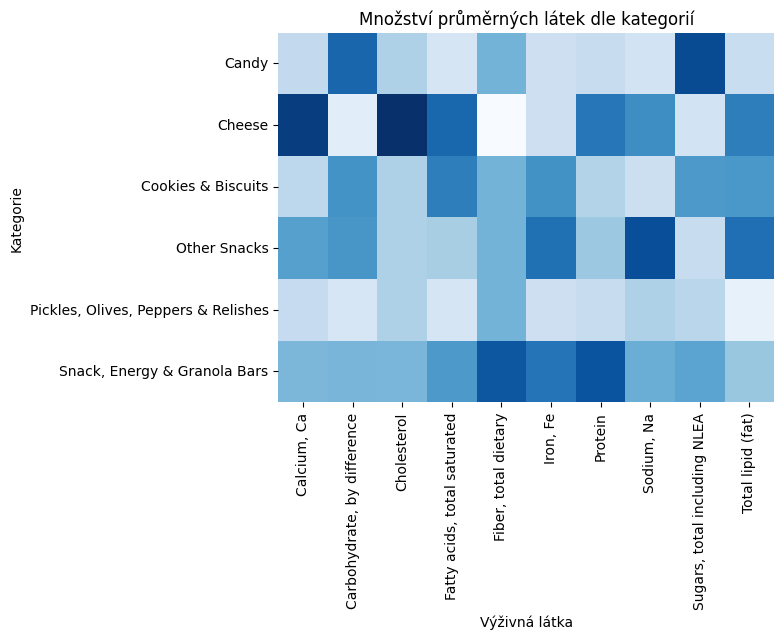

In [29]:
import seaborn as sns
ax = sns.heatmap(food_pivot_norm, cmap = "Blues", cbar = False)
ax.set(xlabel="Výživná látka", ylabel="Kategorie", title="Množství průměrných látek dle kategorií")

[Text(0.5, 23.52222222222222, 'Výživná látka'),
 Text(50.7222222222222, 0.5, 'Kategorie'),
 Text(0.5, 1.0, 'Množství průměrných látek dle kategorií')]

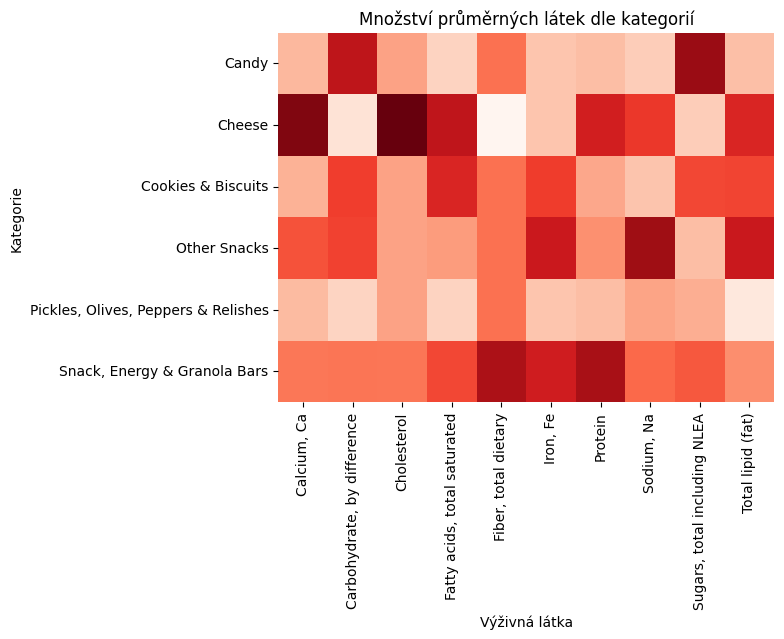

In [33]:
import seaborn as sns
ax = sns.heatmap(food_pivot_norm, cmap = "Reds", cbar = False)
ax.set(xlabel="Výživná látka", ylabel="Kategorie", title="Množství průměrných látek dle kategorií")